# Task. Descriptive statistics

Data source: http://lib.stat.cmu.edu/DASL/Datafiles/Colleges.html
Variable Names:
    - School: Contains the name of each school
    - School_Type: Coded 'LibArts' for liberal arts and 'Univ' for university
    - SAT: Median combined Math and Verbal SAT score of students
    - Acceptance: % of applicants accepted
    - $/Student: Money spent per student in dollars
    - Top 10%: % of students in the top 10% of their h.s. graduating class
    - %PhD: % of faculty at the institution that have PhD degrees
    - Grad%: % of students at institution who eventually graduate

# Libs

In [0]:
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import pylab

# Read data

Исходные данные были добавлены в Excel-таблицу и затем инициализированы как DataFrame с помощью библиотеки pandas

In [0]:
df_raw=pd.read_excel('HW1_T1_data.xlsx')

# Descriptive statistics

Выведение таблицы описательных статистик с помощью функции describe библиотеки pandas

Среднее значение (mean) считается по следующей формуле ![alt text](mean.png "Title")
Среднеквадратичное отклонение выборки: ![alt text](std.png "Title")

In [0]:
df_raw.describe()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000
max,1400.000000,67.000000,102262.000000,98.000000,100.000000,95.000000


Визуализируем описательные статистики

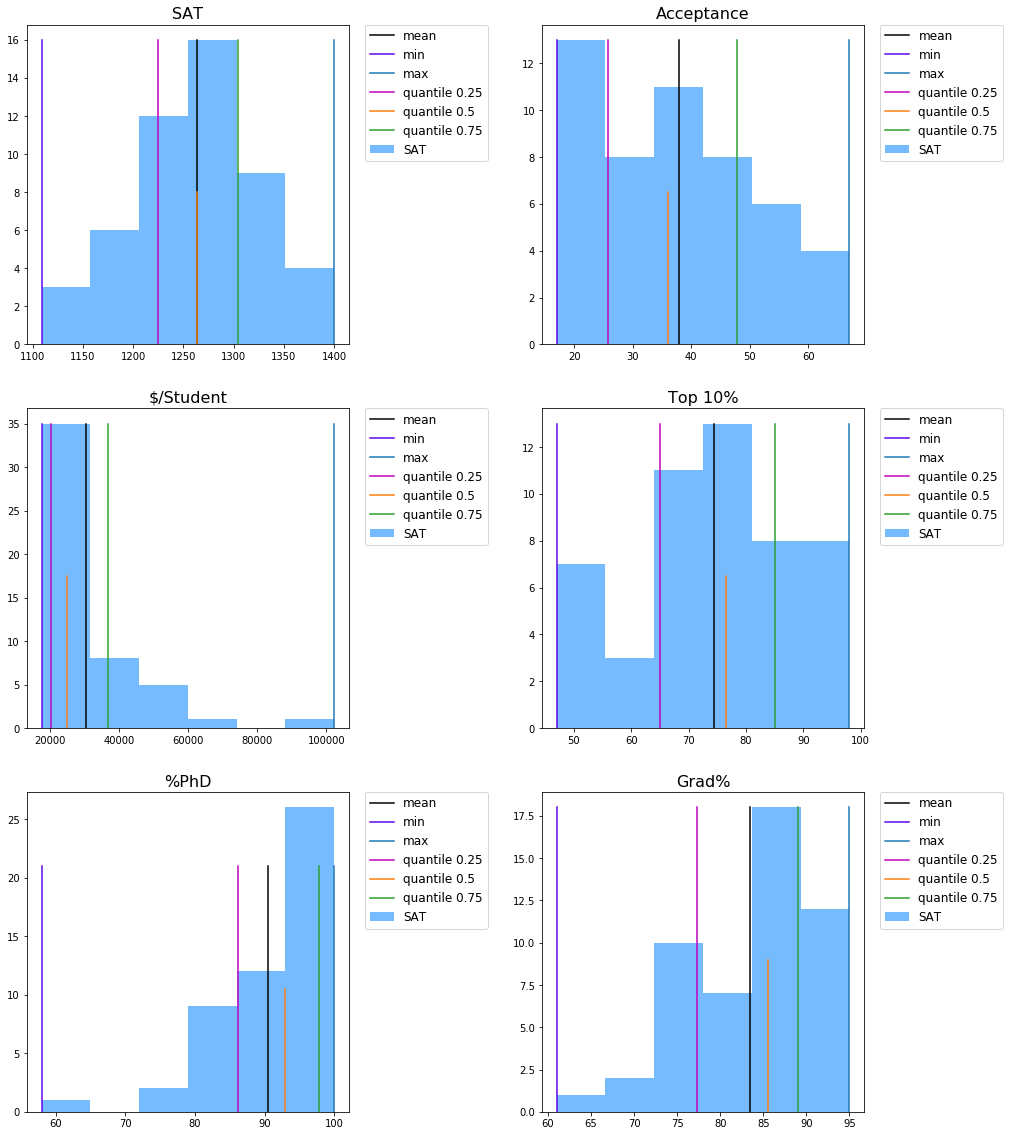

In [0]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
fs = 16
variables = ['SAT', 'Acceptance', '$/Student', 'Top 10%', '%PhD', 'Grad%']

for row in range(3):
    for col in range(2):
        variable = variables[row * 2 + col]
        verticalLineHight = df_raw[variable].value_counts(bins=6).max()
        axes[row, col].hist(df_raw[variable],
                            normed=False,
                            color='xkcd:sky blue',
                            bins=6,
                            label='SAT')
        axes[row, col].plot([df_raw[variable].mean(), df_raw[variable].mean()],
                            [0, verticalLineHight],
                            color='k',
                            label='mean')
        axes[row, col].plot([df_raw[variable].min(), df_raw[variable].min()],
                            [0, verticalLineHight],
                            color='xkcd:blue violet',
                            label='min')
        axes[row, col].plot([df_raw[variable].max(), df_raw[variable].max()],
                            [0, verticalLineHight],
                            label='max')
        axes[row, col].plot(
            [df_raw[variable].quantile(0.25), df_raw[variable].quantile(0.25)],
            [0, verticalLineHight],
            color='m',
            label='quantile 0.25')
        axes[row, col].plot(
            [df_raw[variable].quantile(0.5), df_raw[variable].quantile(0.5)],
            [0, verticalLineHight / 2],
            label='quantile 0.5')
        axes[row, col].plot(
            [df_raw[variable].quantile(0.75), df_raw[variable].quantile(0.75)],
            [0, verticalLineHight],
            label='quantile 0.75')
        axes[row, col].set_title(variable, fontsize=fs)
        axes[row, col].legend(bbox_to_anchor=(1.05, 1),
                              loc=2,
                              borderaxespad=0.,
                              prop={'size': 12})

fig.subplots_adjust(wspace=0.6, hspace=0.2)
plt.show()

Из гистограмм распределения видим:

1. В большинстве университетов стараются тратить на студентов поменьше денег. 
2. В большинстве университетов почти весь преподавательский состав имеет доксторскую степень.

Для самопроверки были написаны функции для вычисления среднего значения и среднеквадратичного отклонения. Вычисленные собственноручно значения совпали с вычисленными с помощью библиотеки pandas

In [0]:
def testMean(df_raw, n):
    sum = 0
    for value in df_raw:
        sum += value
    return sum / n


def testStandardDeviation(df_raw, n):
    df_rawMean = testMean(df_raw, n)
    sum = 0
    for value in df_raw:
        deviation = value - df_rawMean
        sum += math.pow(deviation, 2)
    sum /= (n - 1)
    return math.sqrt(sum)


print('test mean:', testMean(df_raw['SAT'], 50), 'lib mean:',
      df_raw['SAT'].mean())
print('test std:', testStandardDeviation(df_raw['SAT'], 50), 'lib std:',
      df_raw['SAT'].std())

test mean: 1263.96 lib mean: 1263.96
test std: 62.32959136063443 lib std: 62.32959136063443


# Outliers

Поиск выбросов с помощью функции boxplot из библиотеки matplotlib. По умолчанию длина усов равняется полутора межквартильным расстояниям. Данные, выходящие за границы усов, будем считать выбросами

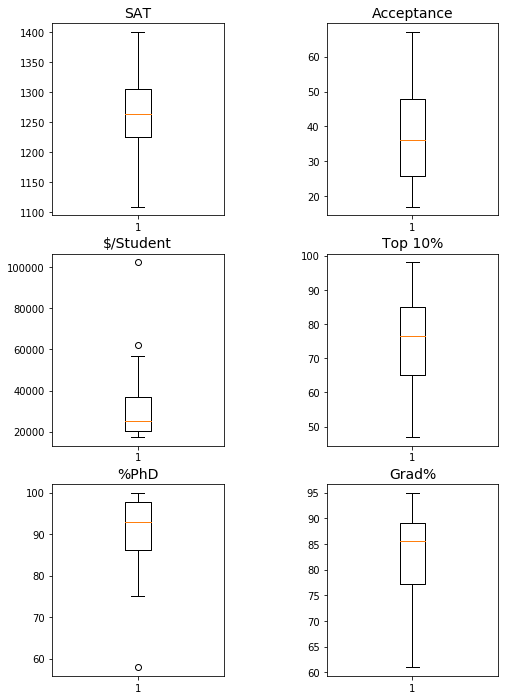

In [0]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
fs=14

axes[0, 0].boxplot(df_raw['SAT'] );
axes[0, 0].set_title('SAT', fontsize=fs)

axes[0, 1].boxplot(df_raw['Acceptance'] );
axes[0, 1].set_title('Acceptance', fontsize=fs)

axes[1, 0].boxplot(df_raw['$/Student'] );
axes[1, 0].set_title('$/Student', fontsize=fs)

axes[1, 1].boxplot(df_raw['Top 10%'] );
axes[1, 1].set_title('Top 10%', fontsize=fs)

axes[2, 0].boxplot(df_raw['%PhD'] );
axes[2, 0].set_title('%PhD', fontsize=fs)

axes[2, 1].boxplot(df_raw['Grad%'] );
axes[2, 1].set_title('Grad%', fontsize=fs)

fig.subplots_adjust(wspace=0.6,hspace=0.2)
plt.show()


Из графиков выше можно видеть, что выбросы присутствуют только у двух переменных: "$/Student" и "%PhD" 

# Correlation 

Причины выбросов можно попробовать установить с помощью вычисления корреляций между переменными. 

Но прежде чем считать коэффициент корреляции Пирсона, проверим распределения переменных. Чтобы приступать к расчётам, необходимо, чтобы переменные были распределены нормально.

## Check for normality

In [0]:
#проверка данных на нормальность при помощи критерия Shapiro-Wilk
print("H0-normal distribution")
for variable in variables:
    print("For ", variable, " p-value=", stats.shapiro(df_raw[variable])[1])

H0-normal distribution
For  SAT  p-value= 0.9981368780136108
For  Acceptance  p-value= 0.0748196467757225
For  $/Student  p-value= 4.333743319762107e-08
For  Top 10%  p-value= 0.1832202821969986
For  %PhD  p-value= 7.882192585384473e-05
For  Grad%  p-value= 0.012669013813138008


Нормальное распределение имеют переменные SAT, Acceptance, Top 10%.

Посмотрим на переменные, распределённые нормально, с наложенными на них нормальными функциями распределения вероятностей

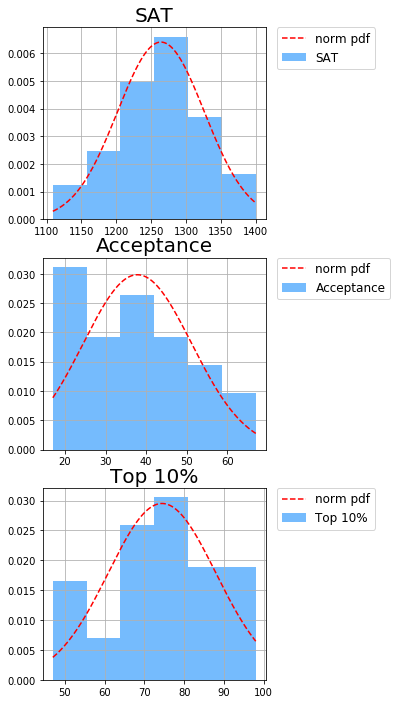

In [0]:
#сравнение гистограммы имеющихся данных с нормальным распределением, 
#имеющим среднее значение и стандартное отклонение, вычисленные ранее

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 12))
fs = 20
variables = ['SAT', 'Acceptance', 'Top 10%']

for row in range(3):
    variable = variables[row]
    axes[row].hist(df_raw[variable],
                   normed=True,
                   color='xkcd:sky blue',
                   bins=6)
    x = np.linspace(df_raw[variable].min(), df_raw[variable].max(), 1000)
    axes[row].plot(x,
                   mlab.normpdf(x, df_raw[variable].mean(),
                                df_raw[variable].std()),
                   'r--',
                   label='norm pdf')
    axes[row].grid(True)
    axes[row].set_title(variable, fontsize=fs)
    axes[row].legend(bbox_to_anchor=(1.05, 1),
                     loc=2,
                     borderaxespad=0.,
                     prop={'size': 12})

fig.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

Гистограммы довольно хорошо совпадают с нормальными функциями распределения

## Manual check of SAT values

Искать коэффициент корреляции для двух переменных "$/Student" и "%PhD", содержащих выбросы нельзя (они распределены не нормально). Но попробуем установить причины выбросов без коэффициента корреляции. Затем выбросы будут отсечены

Отсортируем университеты по баллам SAT и выведем лучшие 5. 

In [0]:
df_raw.sort_values(['SAT']).tail(5)

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
27,Yale,Univ,1350,19,52468,90,97,93
30,MIT,Univ,1357,30,56766,95,98,86
26,Stanford,Univ,1370,18,61921,92,96,88
25,Harvard,Univ,1370,18,46918,90,99,90
29,Cal Tech,Univ,1400,31,102262,98,98,75


Видно, что два значения $/Student, являющиеся выбросами, принадлежат университетам с самыми высокими средними баллами. В этих двух университетах у студентов отличные показатели, поэтому количество затрачиваемых денег на студентов будем считать закономерным и оправданным. Но для анализа эти показатели, конечно, являются выбросами, поэтому их отсечём.

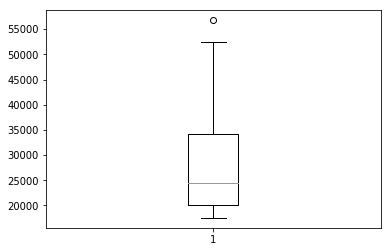

In [0]:
df_without_dollar_outliers = df_raw[df_raw['$/Student'] < 60000]

plt.boxplot(df_without_dollar_outliers['$/Student'])
plt.show()

После отсечения появился ещё один выброс. Так как переменная $/Student не распределена нормально и для неё не будет считаться коэффициент корреляции Пирсона, этот выброс можно оставить.

## Manual check of PhD

Попробуем понять причину выброса переменной %PhD. Для этого попробуем визуально изучить Топ-8 университетов с самым низким процентом преподавателей, имеющих докторскую степень

In [0]:
df_without_dollar_outliers.sort_values(['%PhD']).head(8)

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
39,Johns Hopkins,Univ,1290,48,45460,69,58,86
17,Colby,Lib Arts,1200,46,18872,52,75,84
21,Colgate,Lib Arts,1258,38,17520,61,78,85
47,Northwestern,Univ,1230,47,28851,77,79,82
15,Grinnell,Lib Arts,1244,67,22301,65,79,73
0,Amherst,Lib Arts,1315,22,26636,85,81,93
19,Bates,Lib Arts,1240,36,17554,58,81,88
22,Bryn Mawr,Lib Arts,1255,56,18847,70,81,84


Университет Джона Хопкинса по всем параметрам не уступает учебным заведениям из этого списка. Но при этом показатель %PhD в этом университете крайне мал по сравнению с остальными. Делаю вывод, что это либо случайность, либо ошибка в данных, либо закономерность (например, профессорам в этом университете крайне мало платят), не связанная с приведёнными в данном датасете переменными. Поэтому этот выброс отсекается

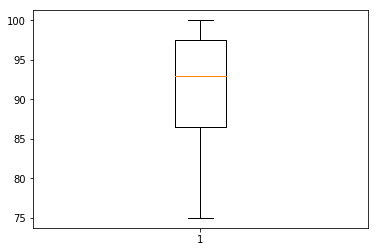

In [0]:
df_without_outliers = df_without_dollar_outliers[
    df_without_dollar_outliers['%PhD'] > 60]

plt.boxplot(df_without_outliers['%PhD'])
plt.show()

Визуализируем гистограммы распределения переменных, в которых удалялись выбросы 

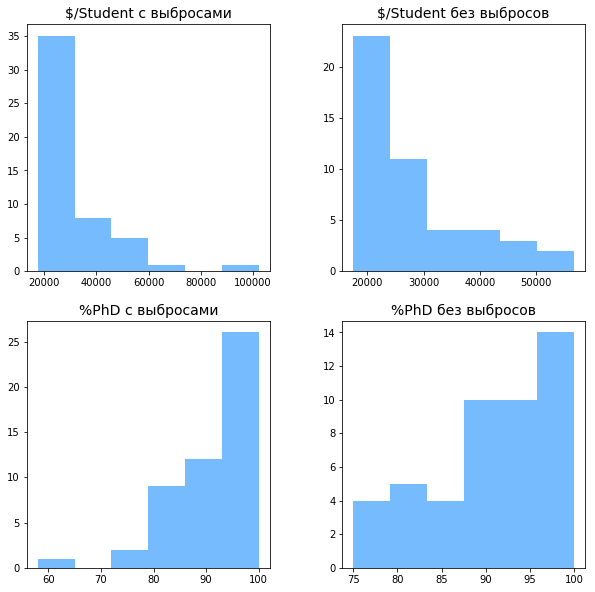

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fs = 14

axes[0, 0].hist(df_raw['$/Student'],
                normed=False,
                color='xkcd:sky blue',
                bins=6,
                label='SAT')
axes[0, 0].set_title('$/Student с выбросами', fontsize=fs)

axes[0, 1].hist(df_without_outliers['$/Student'],
                normed=False,
                color='xkcd:sky blue',
                bins=6,
                label='SAT')
axes[0, 1].set_title('$/Student без выбросов', fontsize=fs)

axes[1, 0].hist(df_raw['%PhD'],
                normed=False,
                color='xkcd:sky blue',
                bins=6,
                label='SAT')
axes[1, 0].set_title('%PhD с выбросами', fontsize=fs)

axes[1, 1].hist(df_without_outliers['%PhD'],
                normed=False,
                color='xkcd:sky blue',
                bins=6,
                label='SAT')
axes[1, 1].set_title('%PhD без выбросов', fontsize=fs)

fig.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

## Pearson correlation 

Выбросы отсечены. Подсчитаем коэффициенты корреляции Пирсона между переменными, распределёнными нормально.

Коэффициенты корелляции рассчитываются по формуле Пирсона: ![alt text](Pearson.png "Title")

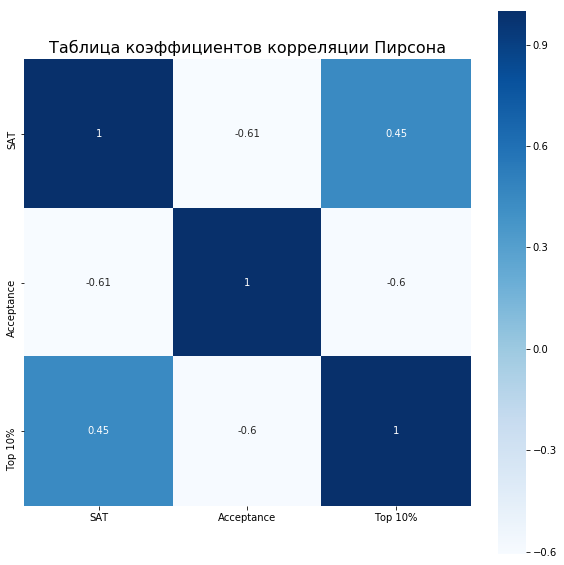

In [0]:
corellation = df_without_outliers[['SAT', 'Acceptance',
                                   'Top 10%']].corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(corellation, vmax=1, square=True, annot=True, cmap='Blues')

plt.title('Таблица коэффициентов корреляции Пирсона', fontsize=16)
plt.show()

Изобразим диаграммы рассеяния для каждой пары переменных и проанализируем полученные результаты

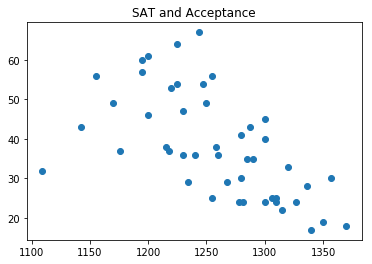

In [0]:
plt.scatter(df_without_outliers['SAT'],df_without_outliers['Acceptance'])
plt.title('SAT and Acceptance')
plt.show()

Коэффициент корреляции Пирсона равен -0.61, что говорит о заметной отрицательной корреляции между переменными. Это хорошо заметно на графике: с увеличением среднего балла уменьшается процент поступивших. Более простыми словами: чем больше средний балл у студентов универститета, тем сложнее в этот университет поступить (больше процент непрошедших)

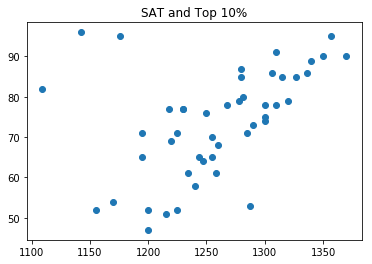

In [0]:
plt.scatter(df_without_outliers['SAT'],df_without_outliers['Top 10%'])
plt.title('SAT and Top 10%')
plt.show()

Коэффициент корреляции Пирсона равен 0.45. Это умеренная положительная корреляция. Чем больше средний балл у студентов университета, тем больший процент этих студентов были лучшими в своих выпускных классах старшей школы. Иными словами: лучшие ученики класса поступали в университеты с бОльшим средним баллом 

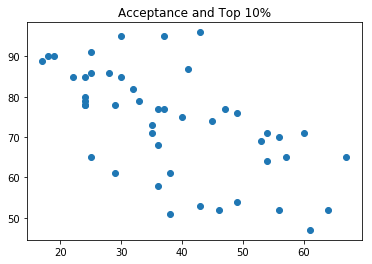

In [0]:
plt.scatter(df_without_outliers['Acceptance'],df_without_outliers['Top 10%'])
plt.title('Acceptance and Top 10%')
plt.show()

Коэффициент корреляции Пирсона равен -0.6, что говорит о заметной отрицательной корреляции между переменными. Получается, лучшие ученики класса идут (и поступают) в университеты с меньшим процентом поступления.

## Kendall correlation

Так как оставшиеся переменные распределены не нормально, для них будем использовать коэффициент корреляции Кендалла. Для пар с умеренным и заметным коэффициентами корреляции построим диаграммы рассеяния

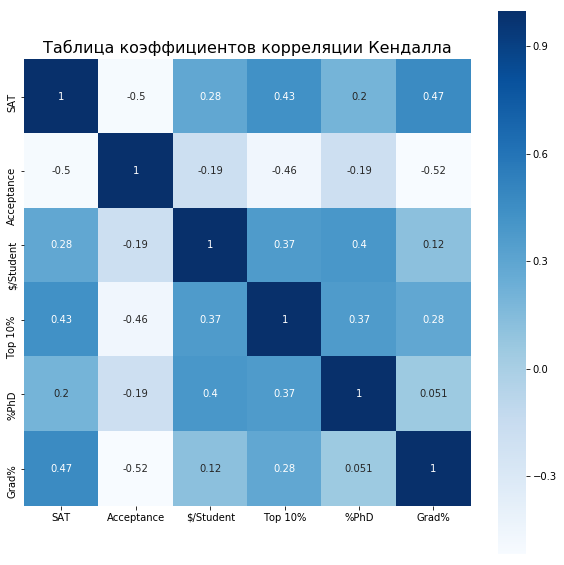

In [0]:
corellation=df_without_outliers.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corellation, vmax=1,square=True,annot=True,cmap='Blues')

plt.title('Таблица коэффициентов корреляции Кендалла', fontsize=16)
plt.show()

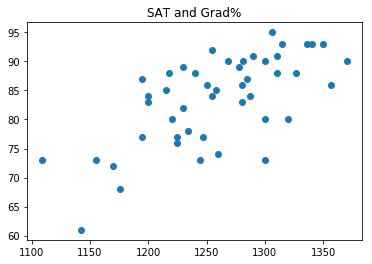

In [0]:
plt.scatter(df_without_outliers['SAT'],df_without_outliers['Grad%'])
plt.title('SAT and Grad%')
plt.show()

Коэффициент корреляции Кендалла равен 0.47. Это умеренная положительная корреляция. В вузах с бОльшим средним баллом студенты более ответственно подходят к учёбе (учитывают усилия, приложенные при подготовке к SAT перед поступлением в университет) и заканчивают обучение доконца

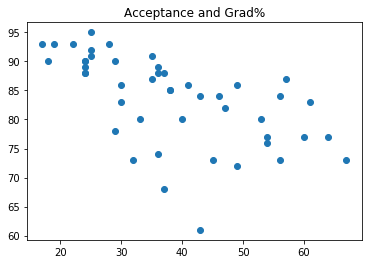

In [0]:
plt.scatter(df_without_outliers['Acceptance'],df_without_outliers['Grad%'])
plt.title('Acceptance and Grad%')
plt.show()

Коэффициент корреляции Кендалла равен -0.52. Это заметная отрицательная корреляция. Когда бОльшая часть поступающих отсеивается, у поступивших появляется стимул закончить обучение